## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import scipy
import seaborn as sns

print(
pd.__version__,
np.__version__,
matplotlib.__version__,
scipy.__version__,
sns.__version__)

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
1.2.1 1.19.2 3.3.2 1.5.2 0.11.1


In [2]:
codontable_standard = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W',
    }
# import standard genetic code as dict

In [3]:
fcy1_wt_seq = 'ATGGTGACAGGGGGAATGGCAAGCAAGTGGGATCAGAAGGGTATGGACATTGCCTATGAGGAGGCGGCCTTAGGTTACAAAGAGGGTGGTGTTCCTATTGGCGGATGTCTTATCAATAACAAAGACGGAAGTGTTCTCGGTCGTGGTCACAACATGAGATTTCAAAAGGGATCCGCCACACTACATGGTGAGATCTCCACTTTGGAAAACTGTGGGAGATTAGAGGGCAAAGTGTACAAAGATACCACTTTGTATACGACGCTGTCTCCATGCGACATGTGTACAGGTGCCATCATCATGTATGGTATTCCACGCTGTGTTGTCGGTGAGAACGTTAATTTCAAAAGTAAGGGCGAGAAATATTTACAAACTAGAGGTCACGAGGTTGTTGTTGTTGACGATGAGAGGTGTAAAAAGATCATGAAACAATTTATCGATGAAAGACCTCAGGATTGGTTTGAAGATATTGGTGAGTAG'
# fcy1 coding sequence

In [4]:
def find_adjacent_mutations(codon, ref_seq):
    # This function takes as input a position and a reference 
    # coding sequence and outputs the amino acid mutants that
    # can be obtained by changing only one nucleotide in
    # the codon
    
    codon_seq = ref_seq[(codon-1)*3: ((codon)*3)]
    # get wt codon dna seq
    
    wt_aa = codontable_standard[codon_seq]
    # translate to aa
       
    dict_of_list = {}
    # container for the mutants found at each codon position
       
    for x in range(0,3):
        dict_of_list[x] = []
        # loop through codon positions and make empty container
        
        for nt in ['A', 'T', 'G', 'C']:
            # loop through nucleotides
            
            nt_list = [x for x in codon_seq]
            # encode codon as list
            
            nt_list[x] = nt
            # change nucleotide
            
            mut_codon = ''.join(nt_list)            
            mut_aa = codontable_standard[mut_codon]
            # convert back to string and then to AA
            
            if mut_codon != codon_seq:
                dict_of_list[x].append(mut_aa)
                # if the change did not reconstitute the wt codon
                # append info to dict
            
    return codon_seq, dict_of_list
            
find_adjacent_mutations(29, fcy1_wt_seq)     
# test on pos 29    

('GGT', {0: ['S', 'C', 'R'], 1: ['D', 'V', 'A'], 2: ['G', 'G', 'G']})

In [5]:
muts_by_pos_1 = {}
muts_by_pos_2 = {}
muts_by_pos_3 = {}
# containers for dicts holding    FCY1 position : aa accessible by one mutation
# pairs for each position in a codon

for codon in range(2,159):
    # loop through FCY1 positions
    
    mut_dict = find_adjacent_mutations(codon, fcy1_wt_seq)[1]
    # get accessible mutations
    
    for x in [0,1,2]:
        muts = list(set(mut_dict[x]))
        # loop through codon positions and get muts
        
        if x ==0:
            muts_by_pos_1[codon] = list(set(mut_dict[x]))
        if x==1:
            muts_by_pos_2[codon] = list(set(mut_dict[x]))
        if x==2:
            muts_by_pos_3[codon] = list(set(mut_dict[x]))
        # append list of muts to the correct dict
    
muts_by_pos_1[157], muts_by_pos_2[157], muts_by_pos_3[157]

(['C', 'S', 'R'], ['V', 'D', 'A'], ['G'])

## Add as DataFrame column

In [6]:
aa_order=['*', 'G','A','V', 'L', 'I', 'M', 'C', 'P', 'W', 'F', 'Y', 'S', 'T', 'N', 'Q', 'H', 'K', 'R', 'D', 'E']
# aa order used for heatmaps and analysis

In [7]:
indexed_pos_dict = {}
# dict container that will be converted to a series once 
# filled

index=0
# index position counter

for x in range(2,159):
    for y in range(0,21):
    # loop through FCY1 positions, then through amino acid variants

        if aa_order[y] in muts_by_pos_1[x]:
            indexed_pos_dict[index]=1
            # if aa variant is accessible by changing the 1st nt
            # of the codon, store info

        elif aa_order[y] in muts_by_pos_2[x]:
            indexed_pos_dict[index]=2
            # if aa variant is accessible by changing the 2nd nt
            # of the codon, store info

        elif aa_order[y] in muts_by_pos_3[x]:
            indexed_pos_dict[index]=3
            # if aa variant is accessible by changing the 3rd nt
            # of the codon, store info

        else:
            indexed_pos_dict[index]='NA'
            # else, annotate it as unaccessible

        index+=1
        # increment index
            
        

## import annotated dataframe

In [8]:
data_df = pd.read_csv('annotated_df_v4.tsv', sep='\t', index_col=0)
data_df

,codon,wt,measured,CY_1,FC_1,CY_2,FC_2,FC_CY_2,CY_3,FC_3,...,ddG_struc_HET,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,nat_variants,r4s_score,RSA,temp,ortholog_aa_freq,dist_act_site
0,2,V,*,-3.828348,-4.319719,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,NaN,NaN
1,2,V,G,-0.845377,-4.267796,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.000000,NaN
2,2,V,A,-0.629818,-3.774048,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.129032,NaN
3,2,V,V,-0.563082,-4.328321,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.096774,NaN
4,2,V,L,-0.858858,-4.281906,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.032258,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,0.071421,-4.487019,...,-0.08375,-0.23928,0.01440,-0.15748,NaN,0.0553,0.595794,20.715000,0.009479,5.711372
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,0.613931,-3.138039,...,-0.63414,-1.22820,0.26376,0.25662,NaN,0.0553,0.595794,20.715000,0.037915,5.711372
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,0.041489,-4.239152,...,-0.84740,-1.73269,0.27192,0.09690,NaN,0.0553,0.595794,20.715000,0.004739,5.711372
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,-0.003728,-4.468121,...,0.31390,0.64312,0.10866,0.19564,NaN,0.0553,0.595794,20.715000,0.000000,5.711372


In [9]:
data_df['pos_base_mut'] = pd.Series(indexed_pos_dict)


In [10]:
data_df

,codon,wt,measured,CY_1,FC_1,CY_2,FC_2,FC_CY_2,CY_3,FC_3,...,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,nat_variants,r4s_score,RSA,temp,ortholog_aa_freq,dist_act_site,pos_base_mut
0,2,V,*,-3.828348,-4.319719,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,NaN,NaN,NA
1,2,V,G,-0.845377,-4.267796,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.000000,NaN,2
2,2,V,A,-0.629818,-3.774048,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.129032,NaN,2
3,2,V,V,-0.563082,-4.328321,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.096774,NaN,3
4,2,V,L,-0.858858,-4.281906,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.032258,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,0.071421,-4.487019,...,-0.23928,0.01440,-0.15748,NaN,0.0553,0.595794,20.715000,0.009479,5.711372,NA
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,0.613931,-3.138039,...,-1.22820,0.26376,0.25662,NaN,0.0553,0.595794,20.715000,0.037915,5.711372,1
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,0.041489,-4.239152,...,-1.73269,0.27192,0.09690,NaN,0.0553,0.595794,20.715000,0.004739,5.711372,NA
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,-0.003728,-4.468121,...,0.64312,0.10866,0.19564,NaN,0.0553,0.595794,20.715000,0.000000,5.711372,3


In [11]:
nonsense_muts = data_df['measured'] == '*'
silent_muts = data_df['wt'] == data_df['measured']

missense_df = data_df[~nonsense_muts&~silent_muts]

nonsense_df = data_df[(nonsense_muts)&(data_df['codon']>5)&(data_df['codon']!=158)]
silent_df = data_df[silent_muts]

In [12]:
len(data_df)

3297

In [13]:
len(silent_df), len(nonsense_df), len(missense_df)

(157, 152, 2983)

In [14]:
colors = sns.color_palette("magma", 4)
palette ={"NA": "k", 1: colors[1], 2: colors[2], 3: colors[3]}
colors
# define color palette

[(0.232077, 0.059889, 0.437695),
 (0.550287, 0.161158, 0.505719),
 (0.868793, 0.287728, 0.409303),
 (0.994738, 0.62435, 0.427397)]

In [15]:
select_valid_stop = (data_df['codon'].isin([2,3,4,5,158]) == False) & (data_df['measured'] == '*')
stops_for_dist = data_df[select_valid_stop]
np.percentile(stops_for_dist['FC_score'], 1)
# select stop codons of the reference dist and set treshold for resistance

0.9309622729264995

Text(0.5, 0, '5-FC DMS score')

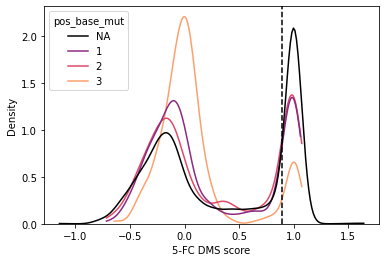

In [16]:
sns.kdeplot(data=data_df, hue='pos_base_mut', x='FC_score', cut=0, common_norm=False, palette=palette, bw_adjust=0.5, hue_order=['NA', 1,2,3])
plt.axvline(np.percentile(stops_for_dist['FC_score'], 0), color='k', linestyle='--')
plt.xlabel('5-FC DMS score')
# plot 5-FC DMS score depending on mutation accessibility

In [17]:
threshold = np.percentile(stops_for_dist['FC_score'], 1)
resistant_muts = data_df[data_df['FC_score']>=threshold]
resistant_muts
# based on threshold, select resistant mutants

,codon,wt,measured,CY_1,FC_1,CY_2,FC_2,FC_CY_2,CY_3,FC_3,...,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,nat_variants,r4s_score,RSA,temp,ortholog_aa_freq,dist_act_site,pos_base_mut
84,6,M,*,-2.938024,1.242867,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5208,0.736453,18.509792,NaN,19.303847,NA
105,7,A,*,-2.589976,1.320948,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.8677,0.615702,14.149000,NaN,18.769834,NA
126,8,S,*,-2.547023,1.328708,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.7803,0.192308,14.804167,NaN,17.106971,NA
147,9,K,*,-2.265573,1.257078,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4550,0.739130,20.678333,NaN,19.359661,1
168,10,W,*,-0.741141,1.200857,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0380,0.196970,18.152143,NaN,15.447535,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,156,I,*,NaN,NaN,NaN,NaN,NaN,-4.359852,1.489992,...,NaN,NaN,NaN,NaN,-0.8920,0.082051,10.215625,NaN,1.328411,NA
3242,156,I,P,NaN,NaN,NaN,NaN,NaN,-4.779000,1.635851,...,8.99980,-0.33360,-0.67764,NaN,-0.8920,0.082051,10.215625,0.0,1.328411,NA
3253,156,I,D,NaN,NaN,NaN,NaN,NaN,-4.201490,1.493758,...,7.77009,0.49780,0.96170,NaN,-0.8920,0.082051,10.215625,0.0,1.328411,NA
3255,157,G,*,NaN,NaN,NaN,NaN,NaN,-3.943047,1.389885,...,NaN,NaN,NaN,NaN,-0.6409,0.020619,10.876250,NaN,3.428099,NA


In [18]:
missense_df[missense_df['FC_score']>=threshold]
# do the same for missense mutants only

,codon,wt,measured,CY_1,FC_1,CY_2,FC_2,FC_CY_2,CY_3,FC_3,...,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,nat_variants,r4s_score,RSA,temp,ortholog_aa_freq,dist_act_site,pos_base_mut
197,11,D,P,-3.010619,1.184536,NaN,NaN,NaN,NaN,NaN,...,15.43422,0.00000,0.00000,NaN,-0.3721,0.085561,13.134375,0.014218,14.187680,NA
255,14,G,V,-2.792690,1.285580,NaN,NaN,NaN,NaN,NaN,...,53.51614,0.00000,0.00000,NaN,-0.0995,0.000000,10.426250,0.000000,11.052810,2
256,14,G,L,-2.867834,1.279111,NaN,NaN,NaN,NaN,NaN,...,44.75174,0.00000,0.00000,NaN,-0.0995,0.000000,10.426250,0.028302,11.052810,NA
257,14,G,I,-2.741381,1.246087,NaN,NaN,NaN,NaN,NaN,...,65.53868,0.00000,0.00002,NaN,-0.0995,0.000000,10.426250,0.000000,11.052810,NA
258,14,G,M,-3.508144,1.193110,NaN,NaN,NaN,NaN,NaN,...,41.31946,0.00000,-0.00002,NaN,-0.0995,0.000000,10.426250,0.037736,11.052810,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,155,D,K,NaN,NaN,NaN,NaN,NaN,-3.002030,1.642487,...,5.27130,0.15124,0.01162,NaN,-0.9460,0.008021,8.413750,0.000000,0.000000,NA
3231,155,D,R,NaN,NaN,NaN,NaN,NaN,-4.400187,1.686119,...,4.49562,0.17150,0.19724,NaN,-0.9460,0.008021,8.413750,0.000000,0.000000,NA
3242,156,I,P,NaN,NaN,NaN,NaN,NaN,-4.779000,1.635851,...,8.99980,-0.33360,-0.67764,NaN,-0.8920,0.082051,10.215625,0.000000,1.328411,NA
3253,156,I,D,NaN,NaN,NaN,NaN,NaN,-4.201490,1.493758,...,7.77009,0.49780,0.96170,NaN,-0.8920,0.082051,10.215625,0.000000,1.328411,NA


In [19]:
len(data_df[data_df['wt']=='M'])/21

6.0

In [20]:
len(data_df[data_df['wt']=='W'])/21

2.0

In [21]:
# this means there are 8 mutants we cannot measure in the DMS screen, +1 missense mutant that we failed to measure = 9 mutants to remove from 3297 -> 3288. All 9 are from the NA category, as 
# G29 is encoded by GGT, so more than 1 mut to get to TGG

In [22]:
data_df['pos_base_mut'].value_counts()

NA    2151
2      458
1      455
3      233
Name: pos_base_mut, dtype: int64

In [23]:
data_df['pos_base_mut'].value_counts().sum()
# total number of variants

3297

In [24]:
(458+455+233)
# variants with accessible mutations

1146

In [25]:
resistant_muts['pos_base_mut'].value_counts().sum()
# resistant mutants

1072

In [26]:
resistant_muts['pos_base_mut'].value_counts()
# breakdown but accessibility

NA    796
2     131
1     119
3      26
Name: pos_base_mut, dtype: int64

In [27]:
[(796/(2151-9)), 119/455, 131/458, 26/233], (119+131+26)/(455+458+233)
# compute fractions for bar plot

([0.3716153127917834,
  0.26153846153846155,
  0.28602620087336245,
  0.11158798283261803],
 0.24083769633507854)

In [28]:
(119+131+26), (455+458+233)
# check sums

(276, 1146)

([<matplotlib.axis.XTick at 0x7f1b3db2bc10>,
 [Text(1, 0, 'NA'),
  Text(3, 0, '1'),
  Text(5, 0, '2'),
  Text(7, 0, '3'),
  Text(9, 0, 'All')])

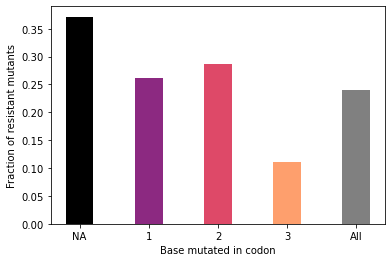

In [29]:
plt.bar([1,3,5,7, 9], [(796/2142), 119/455, 131/458, 26/233, ((119+131+26)/(455+458+233))], color=["k", colors[1], colors[2], colors[3], 'grey'])
plt.xlabel('Base mutated in codon')
plt.ylabel('Fraction of resistant mutants')
plt.xticks([1,3,5,7, 9], ['NA', '1', '2', '3', 'All'])
# plot fraction of resistance mutnts as a function of mutation accessibility

In [30]:
(455+458+233)/3288, (455+458+233)

(0.34854014598540145, 1146)

In [31]:
test_array = [[796,(2142-796)],
              [(119+131+26), ((455+458+233)-(119+131+26))]]

test_array

stats.fisher_exact(test_array)
# test for enrichment

(1.8641385102396795, 1.2544530593509313e-14)

([<matplotlib.axis.XTick at 0x7f1b3daaecd0>,
 [Text(1, 0, 'NA'),
  Text(3, 0, '1'),
  Text(5, 0, '2'),
  Text(7, 0, '3'),
  Text(9, 0, 'Accessible')])

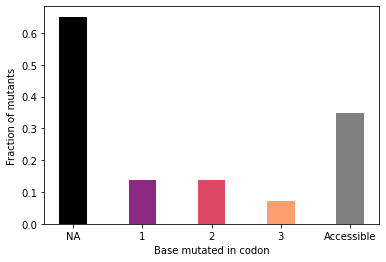

In [32]:
plt.bar([1,3,5,7,9], [(2142)/3288, 455/3288, 458/3288, 233/3288, 1146/3288], color=["k", colors[1], colors[2], colors[3], 'gray'])
plt.xlabel('Base mutated in codon')
plt.ylabel('Fraction of mutants')
plt.xticks([1,3,5,7,9], ['NA', '1', '2', '3', 'Accessible'])
# plot overall mutant accessibility 

In [33]:
796/(2143-796), (119+131+26)/ ((455+458+233)-(119+131+26))
# check sums

(0.5909428359317, 0.31724137931034485)

In [34]:
silent = data_df['measured'] == data_df['wt']
data_df[silent]
# select syninymous mutants only

,codon,wt,measured,CY_1,FC_1,CY_2,FC_2,FC_CY_2,CY_3,FC_3,...,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,nat_variants,r4s_score,RSA,temp,ortholog_aa_freq,dist_act_site,pos_base_mut
3,2,V,V,-0.563082,-4.328321,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.096774,NaN,3
34,3,T,T,0.823289,-2.815307,NaN,NaN,NaN,NaN,NaN,...,-0.00232,0.00000,0.00000,NaN,0.6787,0.634969,36.265714,0.057143,18.357742,3
43,4,G,G,0.361573,-3.386432,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,NaN,0.9772,0.711340,29.141250,0.020408,21.185155,3
64,5,G,G,0.398147,-2.968858,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.00000,0.00000,NaN,1.8833,0.427835,18.532500,0.016667,20.131501,3
90,6,M,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00260,0.00000,0.00000,NaN,2.5208,0.736453,18.509792,0.226667,19.303847,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,154,E,E,NaN,NaN,NaN,NaN,NaN,1.077138,-2.287289,...,0.00000,0.00000,0.00000,NaN,-0.9265,0.091121,10.023333,0.976190,1.329213,3
3232,155,D,D,NaN,NaN,NaN,NaN,NaN,0.326821,-3.441360,...,0.02225,0.00848,0.01126,NaN,-0.9460,0.008021,8.413750,0.976303,0.000000,3
3239,156,I,I,NaN,NaN,NaN,NaN,NaN,1.491384,-1.938522,...,-0.00291,-0.00018,-0.00032,NaN,-0.8920,0.082051,10.215625,0.957346,1.328411,3
3256,157,G,G,NaN,NaN,NaN,NaN,NaN,0.848590,-2.567600,...,0.00000,0.00000,0.00000,NaN,-0.6409,0.020619,10.876250,0.905213,3.428099,3


In [35]:
threshold_CY = np.nanpercentile(data_df[silent]['CY_score'], 1)
threshold_CY
# define wild-type like cytosine DMS score treshold

0.7148245838322209

In [36]:
viable_muts = data_df[data_df['CY_score']>=threshold_CY]
viable_muts

,codon,wt,measured,CY_1,FC_1,CY_2,FC_2,FC_CY_2,CY_3,FC_3,...,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,nat_variants,r4s_score,RSA,temp,ortholog_aa_freq,dist_act_site,pos_base_mut
1,2,V,G,-0.845377,-4.267796,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.000000,NaN,2
2,2,V,A,-0.629818,-3.774048,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.129032,NaN,2
3,2,V,V,-0.563082,-4.328321,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.096774,NaN,3
4,2,V,L,-0.858858,-4.281906,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.032258,NaN,1
5,2,V,I,-0.270221,-3.630948,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.000000,NaN,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,0.071421,-4.487019,...,-0.23928,0.01440,-0.15748,NaN,0.0553,0.595794,20.715000,0.009479,5.711372,NA
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,0.613931,-3.138039,...,-1.22820,0.26376,0.25662,NaN,0.0553,0.595794,20.715000,0.037915,5.711372,1
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,0.041489,-4.239152,...,-1.73269,0.27192,0.09690,NaN,0.0553,0.595794,20.715000,0.004739,5.711372,NA
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,-0.003728,-4.468121,...,0.64312,0.10866,0.19564,NaN,0.0553,0.595794,20.715000,0.000000,5.711372,3


In [37]:
viable_muts['pos_base_mut'].value_counts()
# get per position value counts

NA    291
3     168
1     116
2      81
Name: pos_base_mut, dtype: int64

In [38]:
[(291/2143), 116/455, 81/458, 168/233], (116+81+116)/(455+458+233)
# fractions for barplot

([0.13579094727018198,
  0.2549450549450549,
  0.17685589519650655,
  0.721030042918455],
 0.2731239092495637)

([<matplotlib.axis.XTick at 0x7f1b3db1f710>,
 [Text(1, 0, 'NA'),
  Text(3, 0, '1'),
  Text(5, 0, '2'),
  Text(7, 0, '3'),
  Text(9, 0, 'All')])

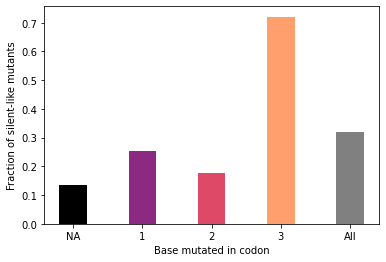

In [39]:
plt.bar([1,3,5,7, 9], [(291/2142), 116/455, 81/458, 168/233, ((116+81+168)/(455+458+233))], color=["k", colors[1], colors[2], colors[3], 'grey'])
plt.xlabel('Base mutated in codon')
plt.ylabel('Fraction of silent-like mutants')
plt.xticks([1,3,5,7, 9], ['NA', '1', '2', '3', 'All'])
# draw barplot

In [40]:
test_array = [[291,(2142-291)],
              [(116+81+168), ((455+458+233)-(116+81+168))]]

test_array
stats.fisher_exact(test_array)
# test for enrichment

(0.3363912879376568, 2.40695009006568e-34)

Text(0.5, 0, 'Cytosine DMS score')

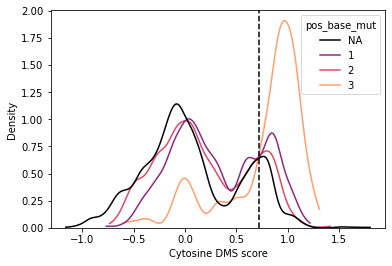

In [41]:
sns.kdeplot(data=data_df, hue='pos_base_mut', x='CY_score', cut=0, common_norm=False, palette=palette, bw_adjust=0.5, hue_order=['NA', 1,2,3])
plt.axvline(threshold_CY, color = 'k', linestyle='--')
plt.xlabel('Cytosine DMS score')
# draw dist with threshold

In [42]:
data_df[data_df['measured']=='*']['pos_base_mut'].value_counts()

NA    99
1     39
3     12
2      7
Name: pos_base_mut, dtype: int64

In [43]:
nonsense_muts = [(x/sum([99,39,7,12])) for x in [99,39,7,12]]
nonsense_muts
# get mutation position fractions for nonsense mutants

[0.6305732484076433,
 0.2484076433121019,
 0.044585987261146494,
 0.07643312101910828]

In [44]:
data_df[data_df['measured']==data_df['wt']]['pos_base_mut'].value_counts()
# NA are spurious counts representing cases where there is only one codon encoding the AA (eg TGG -> TGG)

3     137
1      12
NA      8
Name: pos_base_mut, dtype: int64

In [45]:
data_df[(data_df['measured']==data_df['wt'])&(data_df['pos_base_mut']=='NA')]

,codon,wt,measured,CY_1,FC_1,CY_2,FC_2,FC_CY_2,CY_3,FC_3,...,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,nat_variants,r4s_score,RSA,temp,ortholog_aa_freq,dist_act_site,pos_base_mut
90,6,M,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00260,0.00000,0.00000,NaN,2.5208,0.736453,18.509792,0.226667,19.303847,NA
177,10,W,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.10945,0.00000,0.00000,NaN,1.0380,0.196970,18.152143,0.170213,15.447535,NA
279,15,M,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.05485,0.00000,0.00000,NaN,0.1422,0.019704,12.278542,0.419811,9.998261,NA
1056,52,M,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.02009,-0.00014,0.00050,NaN,0.3527,0.155172,11.323125,0.392523,1.311455,NA
1917,93,M,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.00775,0.00896,-0.04620,NaN,-1.0161,0.004926,7.386875,0.909953,1.320638,NA
2064,100,M,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.06414,-0.06898,-0.07046,NaN,-0.5716,0.081281,7.911875,0.181395,6.876241,NA
2925,141,M,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.07338,0.00000,0.00000,NaN,-0.8547,0.009852,13.834375,0.925581,6.250453,NA
3159,152,W,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.03479,0.00648,0.00162,NaN,-1.0220,0.045455,13.281786,1.000000,2.928607,NA


In [46]:
silent_muts = [(x/sum([0,12,0,137])) for x in [0,12,0,137]]
silent_muts
# get mutation position fractions for synonymous mutants

[0.0, 0.08053691275167785, 0.0, 0.9194630872483222]

In [47]:
data_df[~(data_df['measured']==data_df['wt'])&~(data_df['measured']=='*')]['pos_base_mut'].value_counts()

NA    2044
2      451
1      404
3       84
Name: pos_base_mut, dtype: int64

In [49]:
sum([2043, 404, 451, 84])

2982

In [50]:
missense_muts = [(x/sum([2043, 404, 451, 84])) for x in [2043, 404, 451, 84]]
missense_muts
# get mutation position fractions for missense mutants

[0.6851106639839034,
 0.13547954393024816,
 0.1512407780013414,
 0.028169014084507043]

In [51]:
colors=["k", colors[1], colors[2], colors[3]]

(0.0, 1.0)

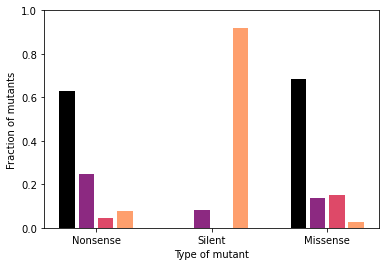

In [52]:
pos=0

for mutation_set in [nonsense_muts, silent_muts, missense_muts]:
    # for type of mutant
    for x in range(0,4):
        # draw fraction of accessible mutation based on position
        
        plt.bar(pos, mutation_set[x], color=colors[x])
        
        pos+=1
        
    pos +=2
    
plt.xticks([1.5, 7.5, 13.5], ['Nonsense', 'Silent', 'Missense'])        
plt.ylabel('Fraction of mutants')    
plt.xlabel('Type of mutant')
plt.ylim(0,1)

## Draw figure S8

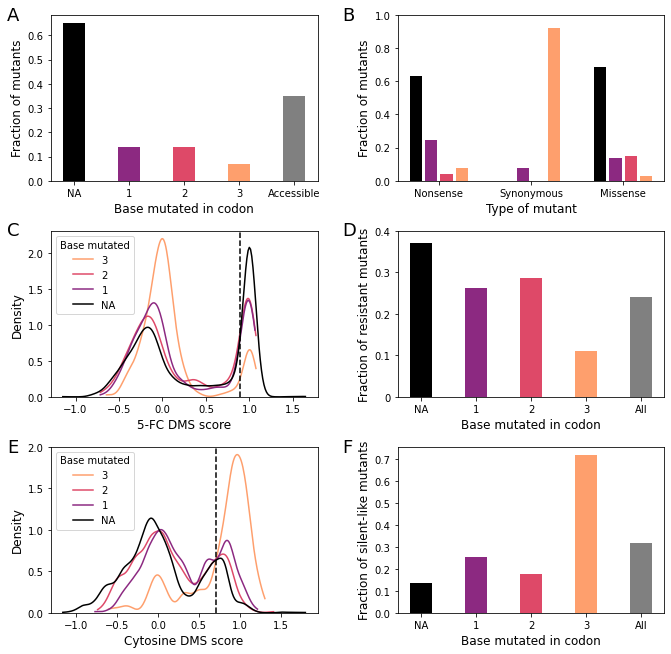

In [53]:
plt.figure(figsize=(11,11))
plt.subplots_adjust(wspace=0.30, hspace=0.30)


############################### panel A
plt.subplot(321)

plt.bar([1,3,5,7,9], [(2142)/3288, 455/3288, 458/3288, 233/3288, 1146/3288], color=["k", colors[1], colors[2], colors[3], 'gray'])

plt.xlabel('Base mutated in codon', fontsize=12)
plt.ylabel('Fraction of mutants', fontsize=12)

plt.xticks([1,3,5,7,9], ['NA', '1', '2', '3', 'Accessible'])



############################### panel B
plt.subplot(322)
pos=0

for mutation_set in [nonsense_muts, silent_muts, missense_muts]:
    
    for x in range(0,4):
        
        plt.bar(pos, mutation_set[x], color=colors[x])
        
        pos+=1
        
    pos +=2
    
plt.xticks([1.5, 7.5, 13.5], ['Nonsense', 'Synonymous', 'Missense'])
        
        
plt.ylabel('Fraction of mutants', fontsize=12)    
plt.xlabel('Type of mutant', fontsize=12)

plt.ylim(0,1)


############################### panel C
plt.subplot(323)

sns.kdeplot(data=data_df, hue='pos_base_mut', x='FC_score', cut=0, common_norm=False, palette=palette, bw_adjust=0.5, hue_order=['NA', 1,2,3], legend=False)
plt.legend(title='Base mutated', labels=['3', '2', '1', 'NA'])

plt.axvline(np.percentile(stops_for_dist['FC_score'], 0), color='k', linestyle='--')
plt.xlabel('5-FC DMS score', fontsize=12)
plt.ylabel('Density', fontsize=12)



############################### panel D
plt.subplot(324)


plt.bar([1,3,5,7, 9], [(796/2142), 119/455, 131/458, 26/233, ((119+131+26)/(455+458+233))], color=["k", colors[1], colors[2], colors[3], 'grey'])

plt.xlabel('Base mutated in codon', fontsize=12)
plt.ylabel('Fraction of resistant mutants', fontsize=12)

plt.xticks([1,3,5,7, 9], ['NA', '1', '2', '3', 'All'])
plt.ylim(0,0.4)

plt.yticks([0, 0.1,0.2,0.3,0.4], [str(x) for x in [0, 0.1,0.2,0.3,0.4]])

############################### panel E
plt.subplot(325)

sns.kdeplot(data=data_df, hue='pos_base_mut', x='CY_score', cut=0, common_norm=False, palette=palette, bw_adjust=0.5, hue_order=['NA', 1,2,3], legend=False)
plt.legend(title='Base mutated', labels=['3', '2', '1', 'NA'])


plt.axvline(threshold_CY, color = 'k', linestyle='--')
plt.xlabel('Cytosine DMS score', fontsize=12)
plt.ylabel('Density', fontsize=12)


############################### panel F
plt.subplot(326)


plt.bar([1,3,5,7, 9], [(291/2142), 116/455, 81/458, 168/233, ((116+81+168)/(455+458+233))], color=["k", colors[1], colors[2], colors[3], 'grey'])


plt.xlabel('Base mutated in codon', fontsize=12)
plt.ylabel('Fraction of silent-like mutants', fontsize=12)

plt.xticks([1,3,5,7, 9], ['NA', '1', '2', '3', 'All'])


plt.text(-1.85,0.73,'F', fontsize=18)
plt.text(-1.85,1.72,'D', fontsize=18)
plt.text(-1.85,2.7,'B', fontsize=18)

plt.text(-14,0.73,'E', fontsize=18)
plt.text(-14,1.72,'C', fontsize=18)
plt.text(-14,2.7,'A', fontsize=18)


plt.savefig('./figures/codon_posv2.svg', format='svg', dpi=300)